# Exercises week 3 part 1: Implement a dense neural network

IN5400 / IN9400 - Machine Learning for Image Analysis

This exercise will walk you through the basics of PyTorch. The goal is for you to become familiar with:
- What is a computational graph
- How to define a pytorch data loader
- How to build a neural network in pytorch
- How to define a pytorch optimizer
- How to train a neural network in pytorch


We will assume the following software versions, but other versions may also work:
- Python 3.8 (at least 3.6 should also work)
- PyTorch 1.7.1


In addition to this exercise, we recommend you to have a look at the official tutorials on pytorch.org

https://pytorch.org/tutorials/index.html

## Play with MNIST Fashion and PyTorch

---
Your task is to use PyTorch to build a model and train a neural network on the MNIST Fashion dataset. Before you can start, you need to have access to the MNIST Fashion dataset. If you use an IFI computer, the default path given in this Jupyter Notebook file will root you to the data. If you work on any other computer, you will need to download the MNIST Fashion dataset. You can download the files from: https://github.com/zalandoresearch/fashion-mnist/tree/master/data/fashion

MINST Fashion files:
- t10k-images-idx3-ubyte.gz
- t10k-labels-idx1-ubyte.gz
- train-images-idx3-ubyte.gz
- train-labels-idx1-ubyte.gz

Do not download the files with rightclick-save as in GitHub, but e.g. with left clicking and using the download button. If you get shape errors in the Dataset and your images files are only as few KBytes small, then you have not successfully downloaded the files.

The MNIST Fashion dataset have 10 classes: ['T-shirt / top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'].  

The training set consists of 60,000 images and the test set consists of 10,000 images. The images are of size [28,28].


**Important!**
You will need to add code only at locations where a NotImplementedError is raised.

<b>"%matplotlib inline"</b> is used to plot figures within Jupyter Notebook.

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from utils.utility_functions import datasetFashionMNIST
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

%matplotlib inline

---
### Step 1: Handling of the data

The following cell creates two instances of "datasetFashionMNIST". The "datasetFashionMNIST" is a "torch.utils.data.Dataset" written for the MNIST Fashion dataset.

If you do not use an IFI computer, edit the "dataPath" to the location of the MNIST Fashion dataset.


In [32]:
#Path to the MNIST Fashion files
#dataPath = 'data/MNIST_fashion/'
dataPath = '/home/sagittarius/Documents/In9400/src/w3/in5400_w3_exercises/mnist_fashion/'

# Create dataset objects
train_dataset = datasetFashionMNIST(dataPath=dataPath, train=True)
val_dataset   = datasetFashionMNIST(dataPath=dataPath, train=False)


/home/sagittarius/Documents/In9400/src/w3/in5400_w3_exercises/mnist_fashion/train-labels-idx1-ubyte.gz (60000,)
/home/sagittarius/Documents/In9400/src/w3/in5400_w3_exercises/mnist_fashion/train-images-idx3-ubyte.gz (47040000,)
/home/sagittarius/Documents/In9400/src/w3/in5400_w3_exercises/mnist_fashion/t10k-labels-idx1-ubyte.gz (10000,)
/home/sagittarius/Documents/In9400/src/w3/in5400_w3_exercises/mnist_fashion/t10k-images-idx3-ubyte.gz (7840000,)


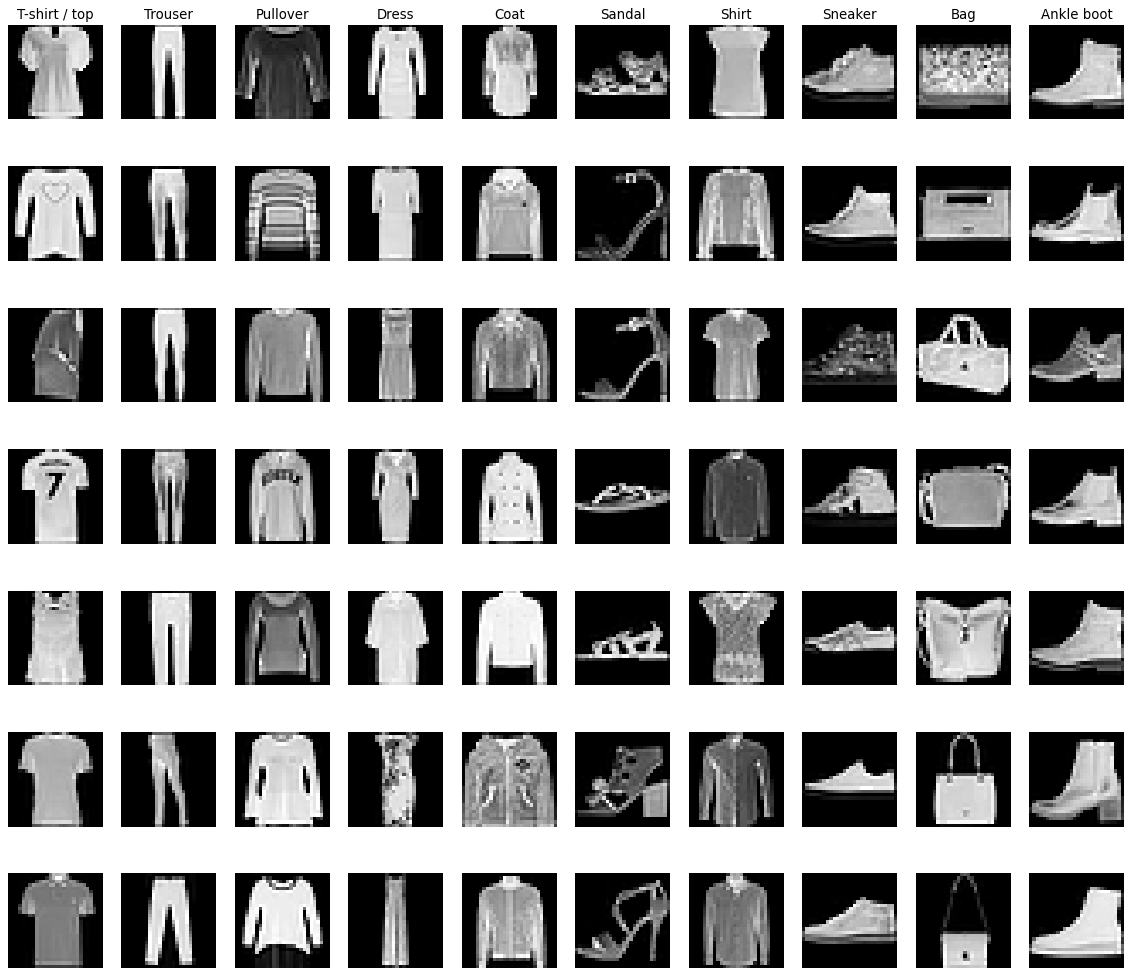

In [33]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['T-shirt / top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_classes = len(classes)
samples_per_class = 7
plt.figure(figsize=(18, 16), dpi=80)
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(np.array(train_dataset.labels) == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        img = (train_dataset.images[idx,:]).astype(np.uint8)
        img = np.resize(img, (28, 28))   # reshape to 28x28
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

---
To keep track of important parameters, we use dictionary "config". When you are done implementing the NotImplementedError's below, you may find it interesting to experiment with different values for the batch size, learning rate and number of epochs trained. 

In [34]:
config = {
          'batch_size': 256,
          'use_cuda': False,      #True=use Nvidia GPU | False use CPU
          'log_interval': 20,     #How often to display (batch) loss during training
          'epochs': 30,           #Number of epochs
          'learningRate': 0.01
         }

We can iterate through the data with the instances of "datasetFashionMNIST". However, we will for convenience use PyTorch's "torch.utils.data.DataLoader" class as it helps us with batching and shuffling of the data. It also makes it possible to use multiple CPU cores/threads to speed up data preprocessing. Your task is to instantiate two data loaders (one for each of the training and validation dataset objects), using PyTorch's dataloader "torch.utils.data.DataLoader". Consider if you will use multiple workers and shuffling of data.

In [35]:
# DataLoaders

workers    = 4
print(train_dataset.images.shape)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = config["batch_size"], shuffle = True, num_workers = workers)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size = config["batch_size"], shuffle = True, num_workers = workers)
    

#raise NotImplementedError('Define \'train_loader\'.')
#raise NotImplementedError('Define \'val_loader\'.')

(60000, 784)


---
### Step 2: Build the model

You are now to define the network architecture. The code provided below defines a fully connected neural network (dense neural network) with two hidden layer of size 128 and 64. However, we encourage you to play with the network configuration.

The input has shape [batch size, 28x28]. The 28x28 image size are being concatenated in "datasetFashionMNIST". Try to change:
- The number of layers
- The size of the hidden layers
- The activation functions


Note that the model inherits from "torch.nn.Module", which requires the two class methods "__init__" and "forward". The former defines the layers used by the model, while the latter defines how the layers are stacked inside the model.


In [36]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        #self.fc1 = nn.Linear(28 * 28, 128)
        #self.fc2 = nn.Linear(128, 64)
        #self.fc3 = nn.Linear(64, 10)
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [37]:
# Create an instance of Model
model = Model()
if config['use_cuda'] == True:
    model.to('cuda')

---
### Step 3: Define optimizer and loss function

Instantiate an optimizer, e.g. stochastic gradient descent, from the "torch.optim" module (https://pytorch.org/docs/stable/optim.html) with your model. Remember that we have defined "learning rate" inside the config-dictionary.


In [38]:
# Create an instance of "torch.optim.SGD"
optimizer = torch.optim.SGD(model.parameters(), lr = config["learningRate"])

#raise NotImplementedError('Define \'optimizer\'.')

---
Here we want to define the loss function (often called criterion). As we are dealing with a classification problem, the softmax cross entropy loss is an appropriate choice.

Hint, have a look here: (https://pytorch.org/docs/stable/nn.html#torch-nn-functional)

In [39]:
def loss_fn(prediction, labels):
    """Returns softmax cross entropy loss."""
    lossfunc = nn.CrossEntropyLoss()
    loss = lossfunc(prediction, labels)
    return loss

---
### Step 4: Set up the training process and train the model

You now have all the building blocks needed to set up the training process. You will implement the function "run_epoch" which shall loop though a dataset and train the model.


In [40]:
def run_epoch(model, epoch, data_loader, optimizer, is_training, config):
    """
    Args:
        model        (obj): The neural network model
        epoch        (int): The current epoch
        data_loader  (obj): A pytorch data loader "torch.utils.data.DataLoader"
        optimizer    (obj): A pytorch optimizer "torch.optim"
        is_training (bool): Whether to use train (update) the model/weights or not. 
        config      (dict): Configuration parameters

    Intermediate:
        totalLoss: (float): The accumulated loss from all batches. 
                            Hint: Should be a numpy scalar and not a pytorch scalar

    Returns:
        loss_avg         (float): The average loss of the dataset
        accuracy         (float): The average accuracy of the dataset
        confusion_matrix (float): A 10x10 matrix
    """
    
    if is_training==True: 
        model.train()
    else:
        model.eval()

    total_loss       = 0 
    correct          = 0 
    confusion_matrix = np.zeros(shape=(10,10))
    labels_list      = [0,1,2,3,4,5,6,7,8,9]

    for batch_idx, data_batch in enumerate(data_loader):
        if config['use_cuda'] == True:
            images = data_batch[0].to('cuda') # send data to GPU
            labels = data_batch[1].to('cuda') # send data to GPU
        else:
            images = data_batch[0]
            labels = data_batch[1]
        
        if not is_training:
            with torch.no_grad():
                prediction = model.forward(images)
                loss = loss_fn(prediction, labels)
                total_loss += loss.sum().numpy()

                #raise NotImplementedError('Store the output of a forward pass in \'prediction\'.')
                #raise NotImplementedError('Compute the loss and store it in \'loss\'.')
                #raise NotImplementedError('Update \'total_loss\'. Note: It can be beneficial to detach \'total_loss\' from the graph, so consider converting the loss to numpy before adding it to \'total_loss\'.')
            
        elif is_training:
            prediction = model.forward(images)
            loss = loss_fn(prediction, labels)
            total_loss += loss.cpu().sum().detach().numpy()
            #raise NotImplementedError('Store the output of a forward pass in \'prediction\'.')
            #raise NotImplementedError('Compute the loss and store it in \'loss\'.')
            #raise NotImplementedError('Update \'total_loss\'. Note: It can be beneficial to detach \'total_loss\' from the graph, so consider converting the loss to numpy before adding it to \'total_loss\'.')
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #raise NotImplementedError('Do a gradient descent step by 1) setting the gradients to zero, 2) performing backpropagation, and 3) updating the parameters.')
            
            

        # Update the number of correct classifications and the confusion matrix
        predicted_label  = prediction.max(1, keepdim=True)[1][:,0]
        correct          += predicted_label.eq(labels).cpu().sum().numpy()
        confusion_matrix += metrics.confusion_matrix(labels.cpu().numpy(), predicted_label.cpu().numpy(), labels=labels_list)

        # Print statistics
        #batchSize = len(labels)
        if batch_idx % config['log_interval'] == 0:
            print(f'Epoch={epoch} | {(batch_idx+1)/len(data_loader)*100:.2f}% | loss = {loss:.5f}')

    loss_avg         = total_loss / len(data_loader)
    accuracy         = correct / len(data_loader.dataset)
    confusion_matrix = confusion_matrix / len(data_loader.dataset)

    return loss_avg, accuracy, confusion_matrix


---
Here is where the action takes place!

In [41]:
# train the model
train_loss = np.zeros(shape=config['epochs'])
train_acc  = np.zeros(shape=config['epochs'])
val_loss   = np.zeros(shape=config['epochs'])
val_acc    = np.zeros(shape=config['epochs'])
train_confusion_matrix = np.zeros(shape=(10,10,config['epochs']))
val_confusion_matrix   = np.zeros(shape=(10,10,config['epochs']))

for epoch in range(config['epochs']):
    train_loss[epoch], train_acc[epoch], train_confusion_matrix[:,:,epoch] = \
                               run_epoch(model, epoch, train_loader, optimizer, is_training=True, config=config)

    val_loss[epoch], val_acc[epoch], val_confusion_matrix[:,:,epoch]     = \
                               run_epoch(model, epoch, val_loader, optimizer, is_training=False, config=config)

Epoch=0 | 0.43% | loss = 2.44329
Epoch=0 | 8.94% | loss = 2.14032
Epoch=0 | 17.45% | loss = 1.95753
Epoch=0 | 25.96% | loss = 1.76881
Epoch=0 | 34.47% | loss = 1.50884
Epoch=0 | 42.98% | loss = 1.41712
Epoch=0 | 51.49% | loss = 1.23329
Epoch=0 | 60.00% | loss = 1.19223
Epoch=0 | 68.51% | loss = 0.97246
Epoch=0 | 77.02% | loss = 1.06042
Epoch=0 | 85.53% | loss = 1.01412
Epoch=0 | 94.04% | loss = 0.91537
Epoch=0 | 2.50% | loss = 0.86176
Epoch=0 | 52.50% | loss = 0.88493
Epoch=1 | 0.43% | loss = 0.79864
Epoch=1 | 8.94% | loss = 0.81379
Epoch=1 | 17.45% | loss = 0.81930
Epoch=1 | 25.96% | loss = 0.78555
Epoch=1 | 34.47% | loss = 0.73511
Epoch=1 | 42.98% | loss = 0.71320
Epoch=1 | 51.49% | loss = 0.81823
Epoch=1 | 60.00% | loss = 0.66060
Epoch=1 | 68.51% | loss = 0.57004
Epoch=1 | 77.02% | loss = 0.63152
Epoch=1 | 85.53% | loss = 0.69802
Epoch=1 | 94.04% | loss = 0.72619
Epoch=1 | 2.50% | loss = 0.59531
Epoch=1 | 52.50% | loss = 0.68892
Epoch=2 | 0.43% | loss = 0.63624
Epoch=2 | 8.94% | los

---
### Step 5. Plot the train and validation losses
Plot the loss and the accuracy as a function of epochs to monitor the training.


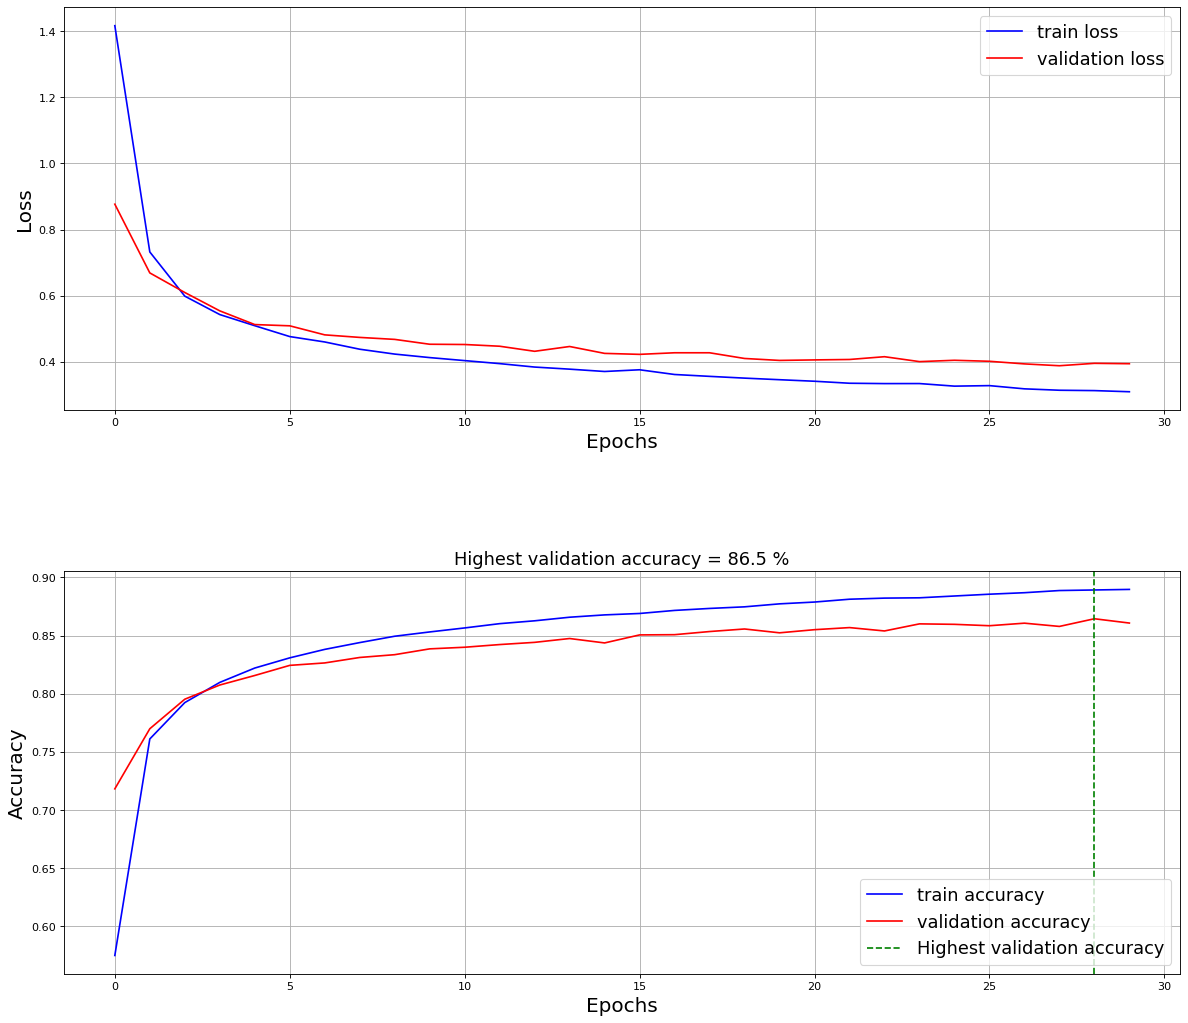

In [42]:
# Plot the loss and the accuracy in training and validation
#plt.figure()
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(2, 1, 1)
# plt.subplots_adjust(hspace=2)
ax.plot(train_loss, 'b', label='train loss')
ax.plot(val_loss, 'r', label='validation loss')
ax.grid()
plt.ylabel('Loss', fontsize=18)
plt.xlabel('Epochs', fontsize=18)
ax.legend(loc='upper right', fontsize=16)

ax = plt.subplot(2, 1, 2)
plt.subplots_adjust(hspace=0.4)
ax.plot(train_acc, 'b', label='train accuracy')
ax.plot(val_acc, 'r', label='validation accuracy')
ax.grid()
plt.ylabel('Accuracy', fontsize=18)
plt.xlabel('Epochs', fontsize=18)
val_acc_max = np.max(val_acc)
val_acc_max_ind = np.argmax(val_acc)
plt.axvline(x=val_acc_max_ind, color='g', linestyle='--', label='Highest validation accuracy')
plt.title('Highest validation accuracy = %0.1f %%' % (val_acc_max*100), fontsize=16)
ax.legend(loc='lower right', fontsize=16)
plt.ion()

---
Let us study the accuracy per class on the validation dataset. We use the result from the epoch with highest validation accuracy.


In [43]:
ind = np.argmax(val_acc)
class_accuracy = val_confusion_matrix[:,:,ind]
for ii in range(len(classes)):
    acc = val_confusion_matrix[ii,ii,ind] / np.sum(val_confusion_matrix[ii,:,ind])
    print(f'Accuracy of {str(classes[ii]).ljust(15)}: {acc*100:.01f}%')

Accuracy of T-shirt / top  : 83.5%
Accuracy of Trouser        : 96.0%
Accuracy of Pullover       : 78.5%
Accuracy of Dress          : 87.7%
Accuracy of Coat           : 80.5%
Accuracy of Sandal         : 92.1%
Accuracy of Shirt          : 61.9%
Accuracy of Sneaker        : 95.2%
Accuracy of Bag            : 95.5%
Accuracy of Ankle boot     : 93.6%


---
In order to see how the network learns to distinguish the different classes as the training progresses, we can plot the confusion matrices after each second epoch as heatmaps.

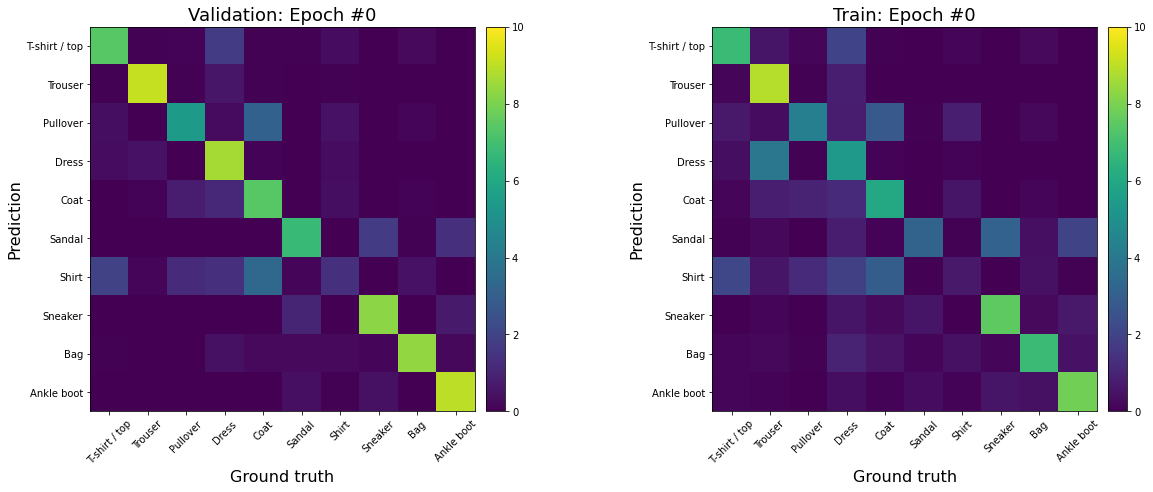

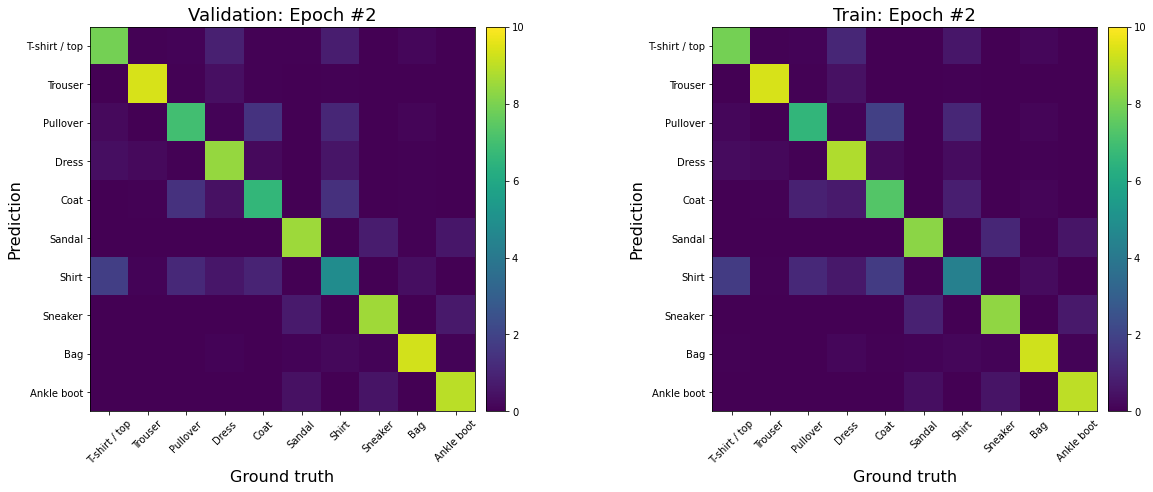

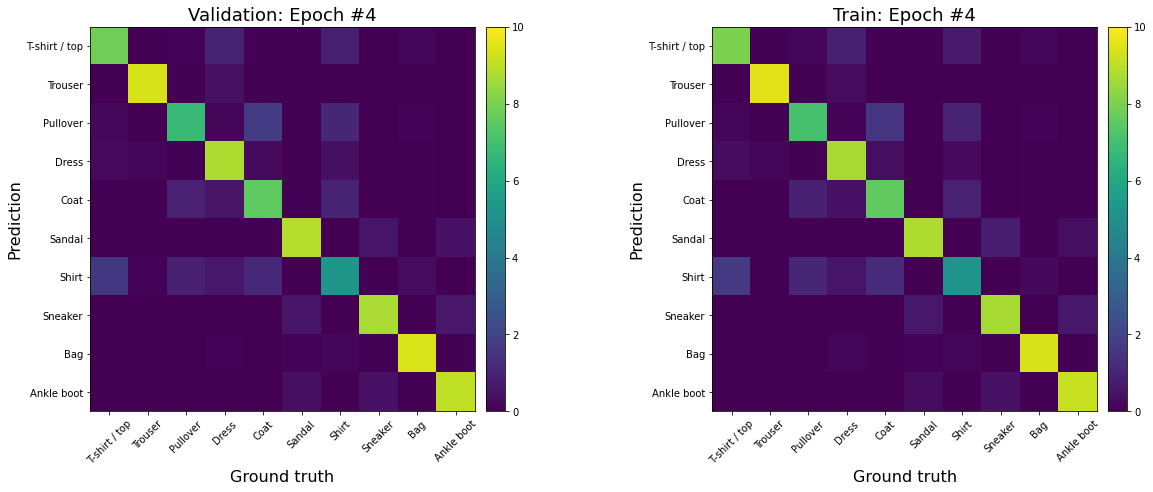

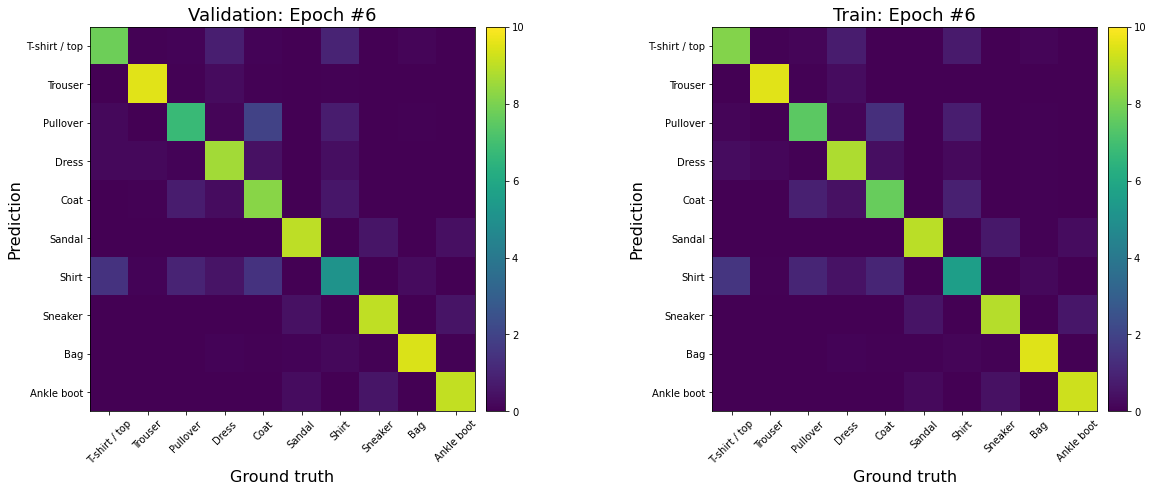

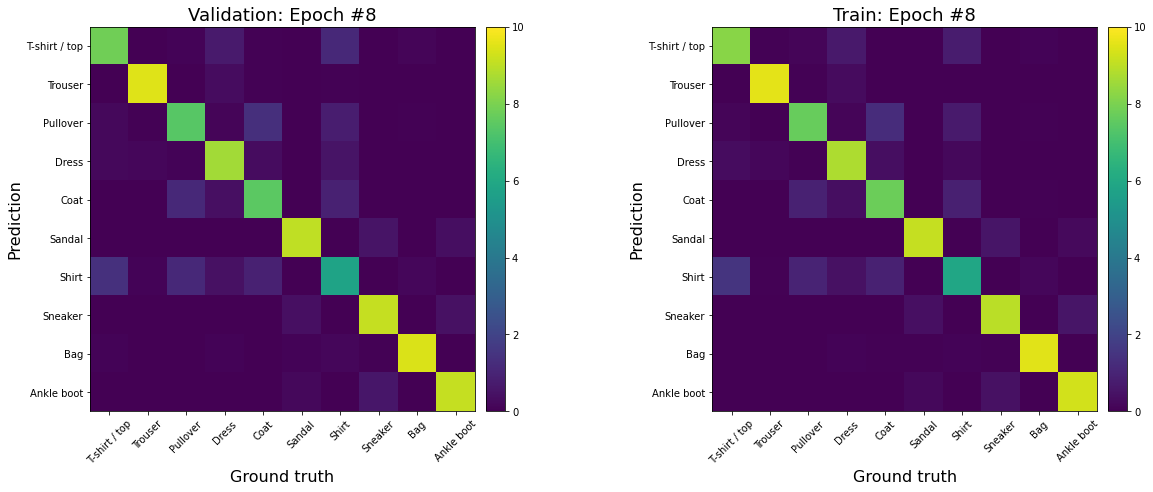

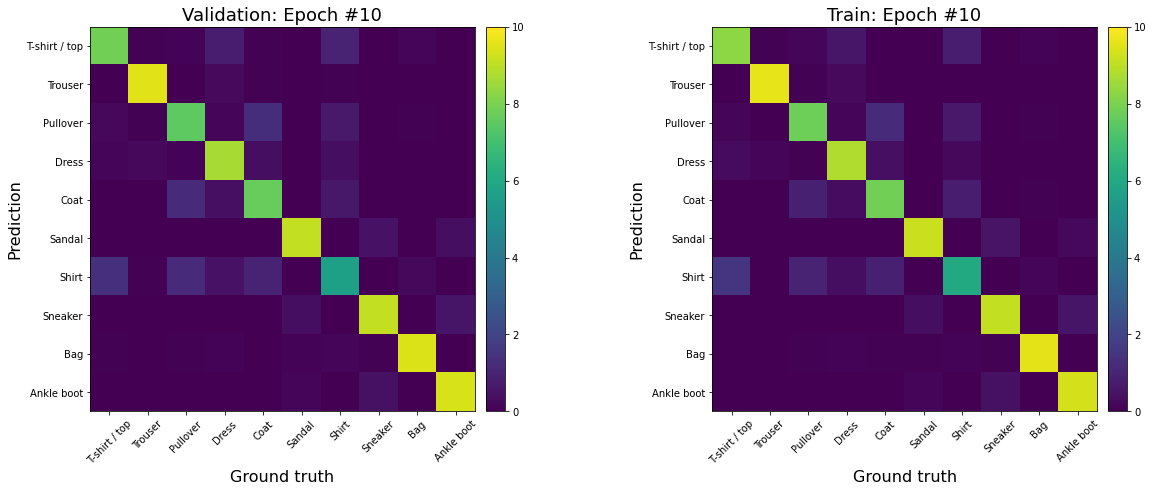

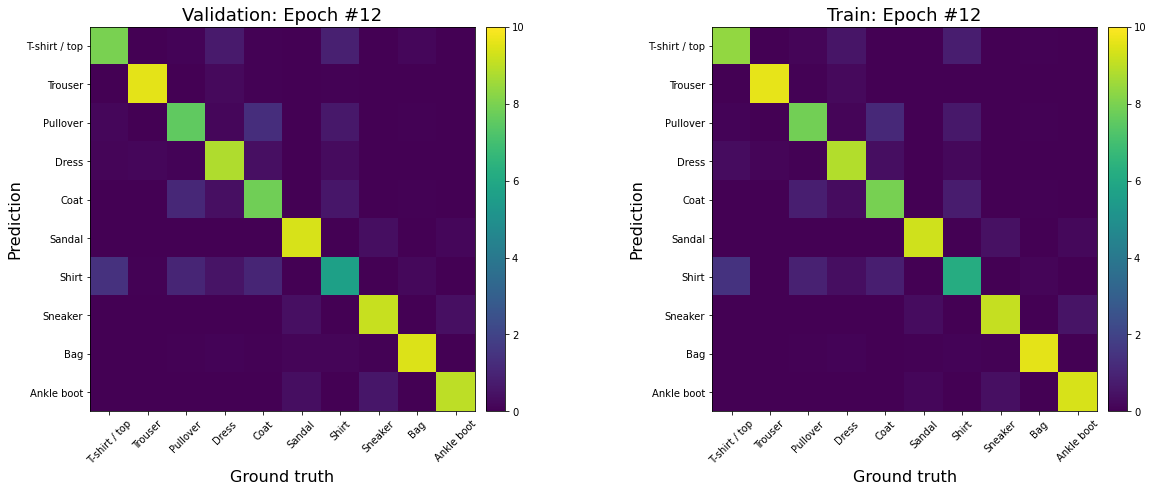

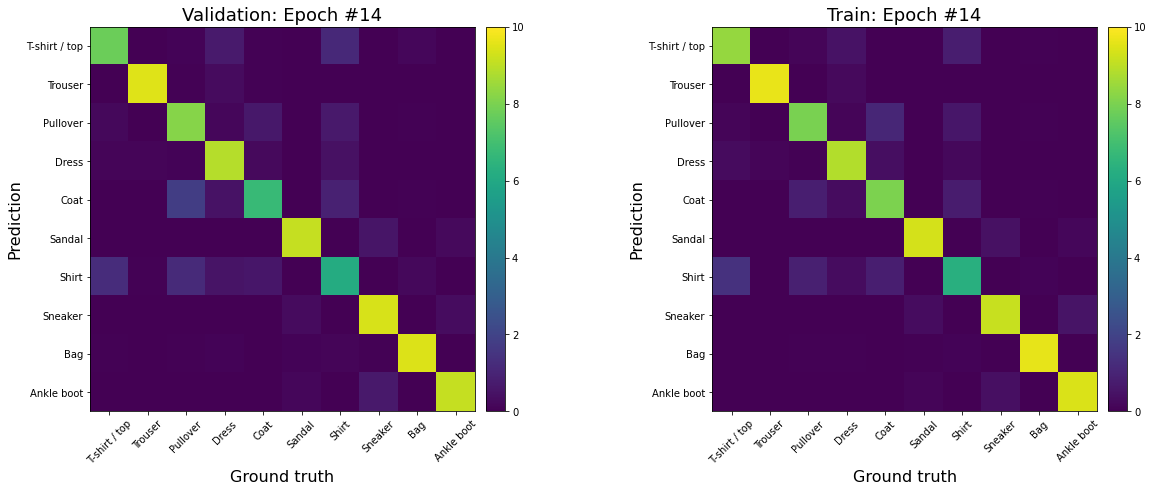

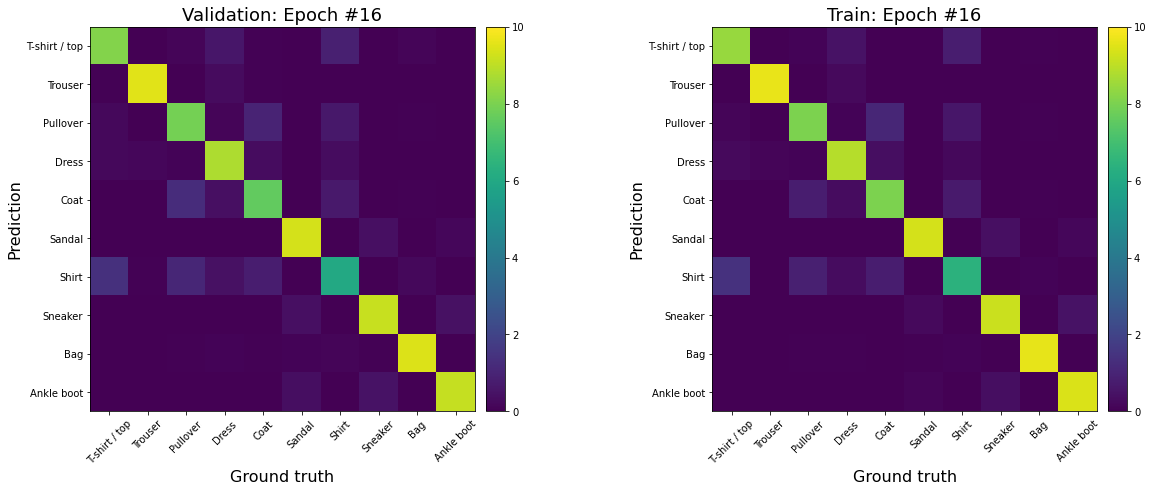

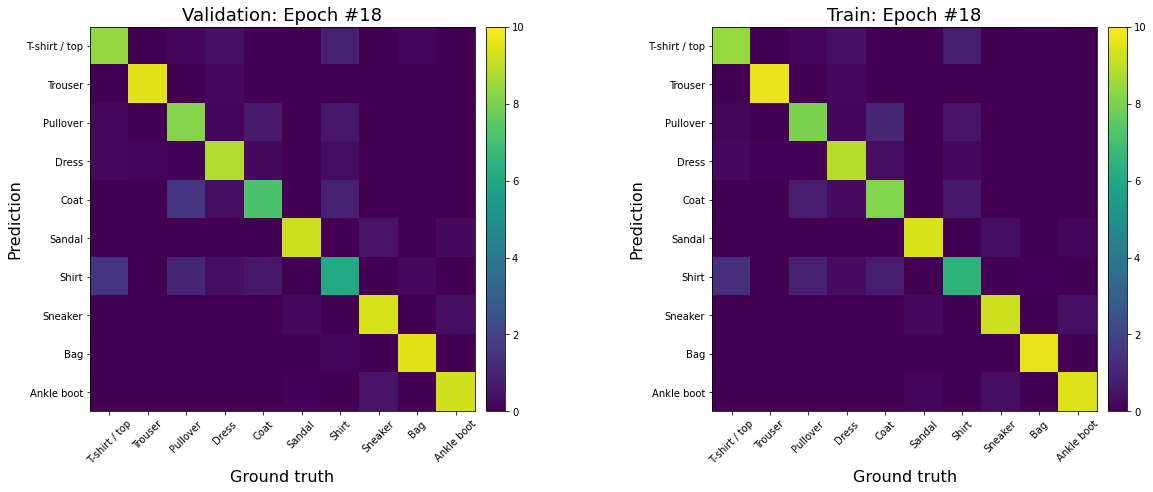

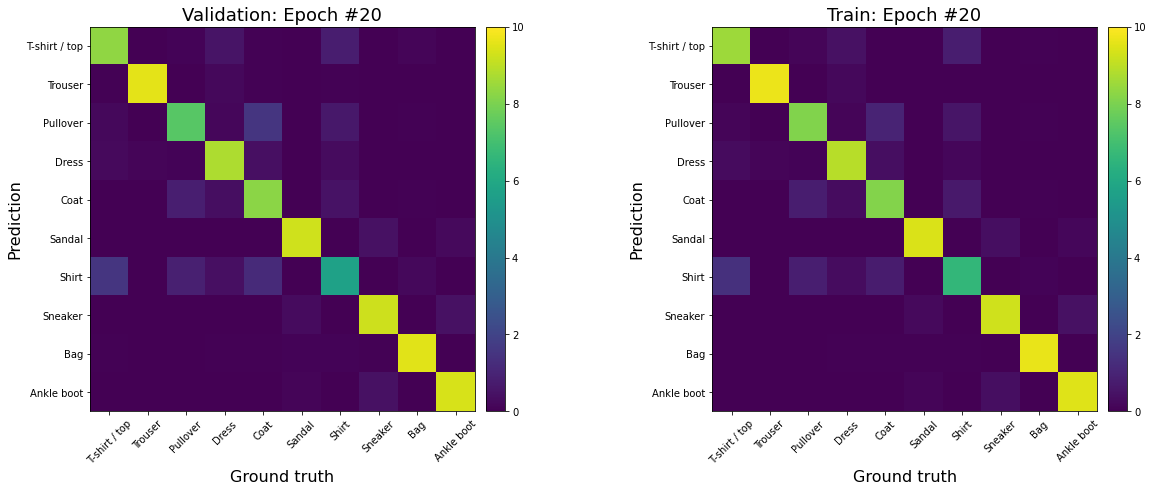

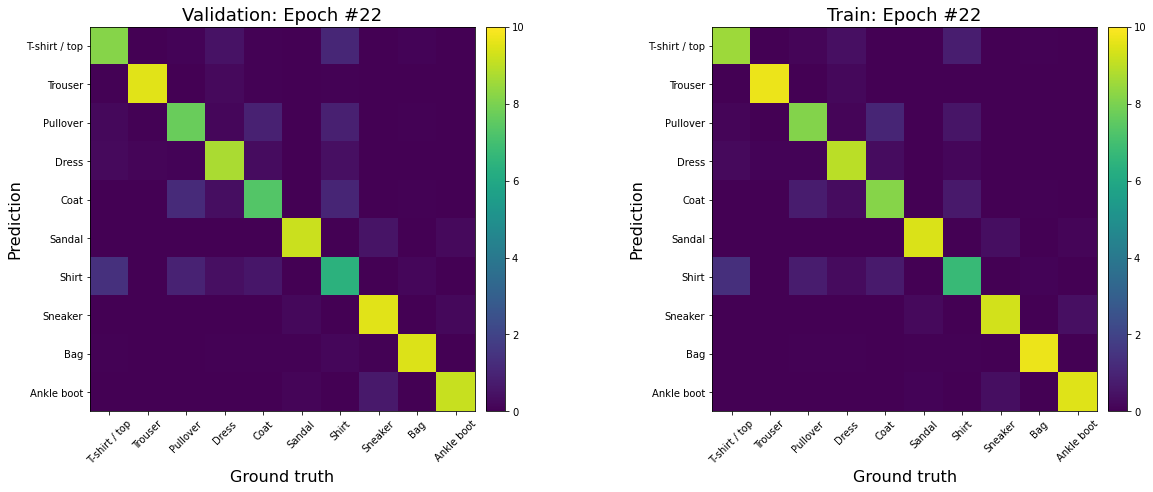

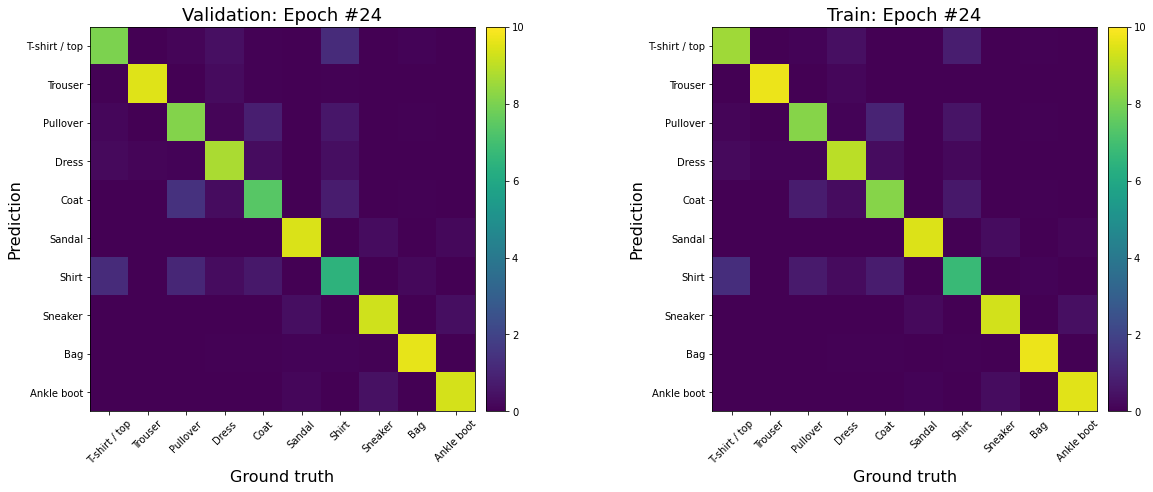

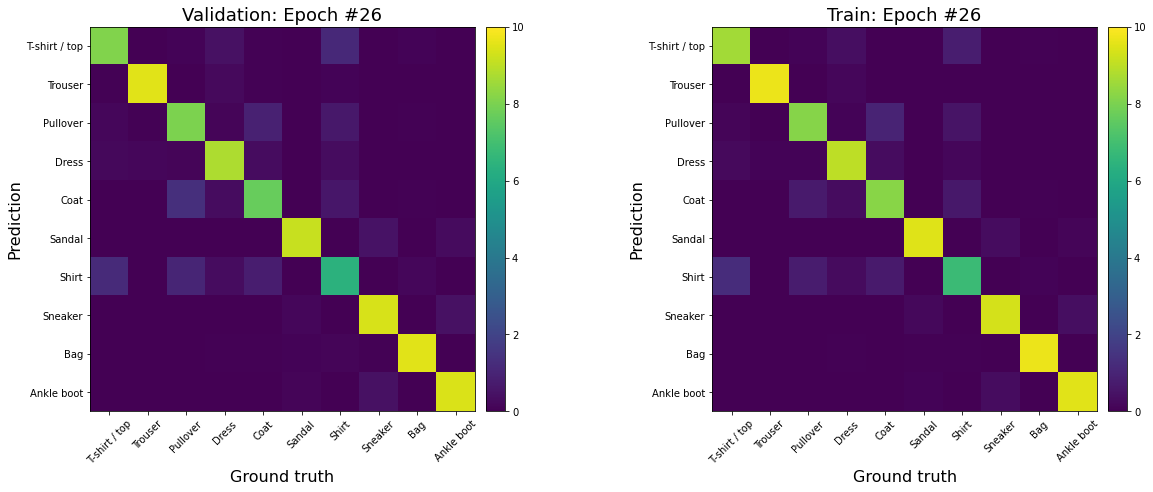

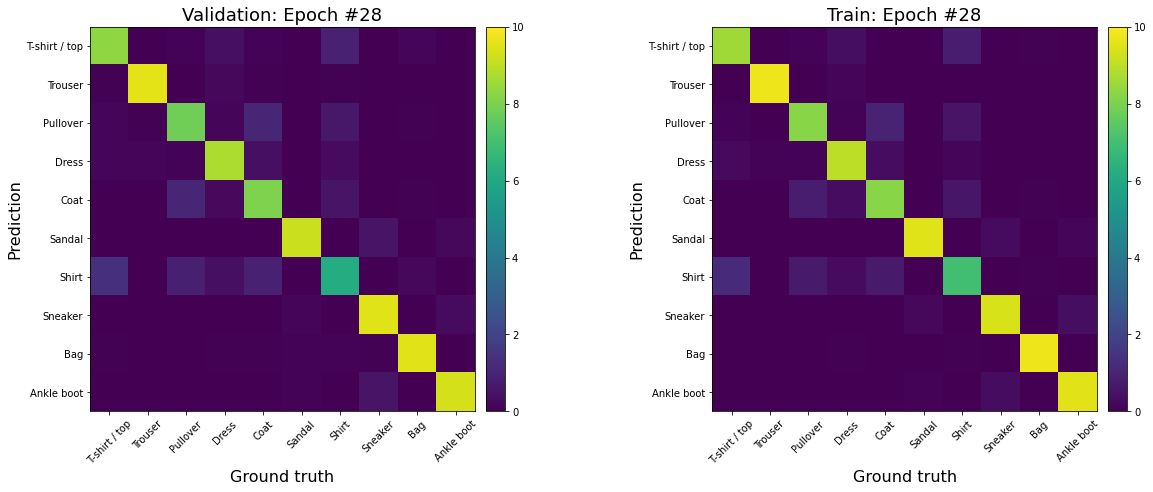

In [44]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

epoch_step                  = 2    
set_colorbar_max_percentage = 10 
    
# Plot confusion matrices
ticks = np.linspace(0,9,10)
gridspec_kwargs = dict(top=0.9, bottom=0.1, left=0.0, right=0.9, wspace=0.5, hspace=0.2)
for i in range(0, config['epochs'], epoch_step):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 16), gridspec_kw=gridspec_kwargs)
    im = ax1.imshow(val_confusion_matrix[:, :, i]*100)
    ax1.set_title(f'Validation: Epoch #{i}', fontsize=18)
    ax1.set_xticks(ticks=ticks)
    ax1.set_yticks(ticks=ticks)
    ax1.set_yticklabels(classes)
    im.set_clim(0.0, set_colorbar_max_percentage)
    ax1.set_xticklabels(classes, rotation=45)
    ax1.set_ylabel('Prediction', fontsize=16)
    ax1.set_xlabel('Ground truth', fontsize=16)
    divider = make_axes_locatable(ax1)
    cax     = divider.append_axes('right', size='5%', pad=0.15)
    f.colorbar(im, cax=cax, orientation='vertical')
    
    im = ax2.imshow(train_confusion_matrix[:, :, i]*100)
    ax2.set_title(f'Train: Epoch #{i}', fontsize=18)
    ax2.set_xticks(ticks=ticks)
    ax2.set_yticks(ticks=ticks)
    ax2.set_yticklabels(classes)
    im.set_clim(0.0, set_colorbar_max_percentage)
    ax2.set_xticklabels(classes, rotation=45)
    ax2.set_ylabel('Prediction', fontsize=16)
    ax2.set_xlabel('Ground truth', fontsize=16)
    divider = make_axes_locatable(ax2)
    cax     = divider.append_axes('right', size='5%', pad=0.15)
    f.colorbar(im, cax=cax, orientation='vertical')    